In [1]:
import pandas as pd
import numpy as np
import pydtmc
df = pd.read_csv('transition_matrix.csv').fillna(0)
df

,Env,NS,B,D,VD,SP,GP,WP,M,BB
0,NS,0.8,0.2,0.0,0.0,0.00,0.00,0.00,0.0,0.00
1,Beach,0.1,0.7,0.2,0.0,0.00,0.00,0.00,0.0,0.00
2,Dune,0.0,0.2,0.5,0.1,0.20,0.00,0.00,0.0,0.00
3,Veg. Dune,0.0,0.2,0.1,0.5,0.20,0.00,0.00,0.0,0.00
4,Sandy platform,0.0,0.0,0.0,0.0,0.45,0.40,0.10,0.0,0.05
5,Grassy platform,0.0,0.0,0.0,0.0,0.20,0.50,0.10,0.1,0.10
6,Woody platform,0.0,0.0,0.0,0.0,0.15,0.00,0.80,0.0,0.05
7,Marsh,0.0,0.0,0.0,0.0,0.10,0.05,0.05,0.7,0.10
8,Back bay,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.3,0.70


In [2]:
env = df['Env'].tolist()
print(env)
tm = df.iloc[:, 1:].to_numpy()
tm

['NS', 'Beach', 'Dune', 'Veg. Dune', 'Sandy platform', 'Grassy platform', 'Woody platform', 'Marsh', 'Back bay']


array([[0.8 , 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.1 , 0.7 , 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.2 , 0.5 , 0.1 , 0.2 , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.2 , 0.1 , 0.5 , 0.2 , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.45, 0.4 , 0.1 , 0.  , 0.05],
       [0.  , 0.  , 0.  , 0.  , 0.2 , 0.5 , 0.1 , 0.1 , 0.1 ],
       [0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.8 , 0.  , 0.05],
       [0.  , 0.  , 0.  , 0.  , 0.1 , 0.05, 0.05, 0.7 , 0.1 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.7 ]])

In [6]:
mc = pydtmc.MarkovChain(tm, env)
print(mc)
print(mc.transient_states)
print(mc.recurrent_states)


DISCRETE-TIME MARKOV CHAIN
 SIZE:           9
 RANK:           9
 CLASSES:        2
  > RECURRENT:   1
  > TRANSIENT:   1
 ERGODIC:        NO
  > APERIODIC:   YES
  > IRREDUCIBLE: NO
 ABSORBING:      NO
 REGULAR:        NO
 REVERSIBLE:     NO
 SYMMETRIC:      NO

['NS', 'Beach', 'Dune', 'Veg. Dune']
['Sandy platform', 'Grassy platform', 'Woody platform', 'Marsh', 'Back bay']


In [14]:
walk = ['NS']
for i in range(1, 21):
    current_state = walk[-1]
    next_state = mc.next_state(current_state, seed=32)
    print(f'{i:02} {current_state} -> {next_state}')
    walk.append(next_state)

01 NS -> Beach
02 Beach -> Dune
03 Dune -> Sandy platform
04 Sandy platform -> Woody platform
05 Woody platform -> Woody platform
06 Woody platform -> Woody platform
07 Woody platform -> Woody platform
08 Woody platform -> Woody platform
09 Woody platform -> Woody platform
10 Woody platform -> Woody platform
11 Woody platform -> Woody platform
12 Woody platform -> Woody platform
13 Woody platform -> Woody platform
14 Woody platform -> Woody platform
15 Woody platform -> Woody platform
16 Woody platform -> Woody platform
17 Woody platform -> Woody platform
18 Woody platform -> Woody platform
19 Woody platform -> Woody platform
20 Woody platform -> Woody platform


In [ ]:
pydtmc.plot_eigenvalues(mc)

>>> plot_graph(mc)
>>> plot_redistributions(mc, 10, plot_type='heatmap', dpi=300)
>>> plot_redistributions(mc, 10, plot_type='projection', dpi=300)
>>> plot_walk(mc, 10, plot_type='histogram', dpi=300)
>>> plot_walk(mc, 10, plot_type='sequence', dpi=300)
>>> plot_walk(mc, 10, plot_type='transitions', dpi=300)

C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\CRS\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


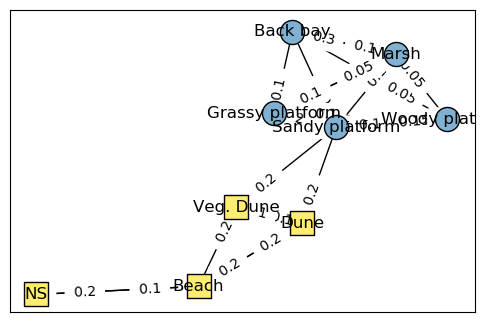

In [15]:
pydtmc.plot_graph(mc)

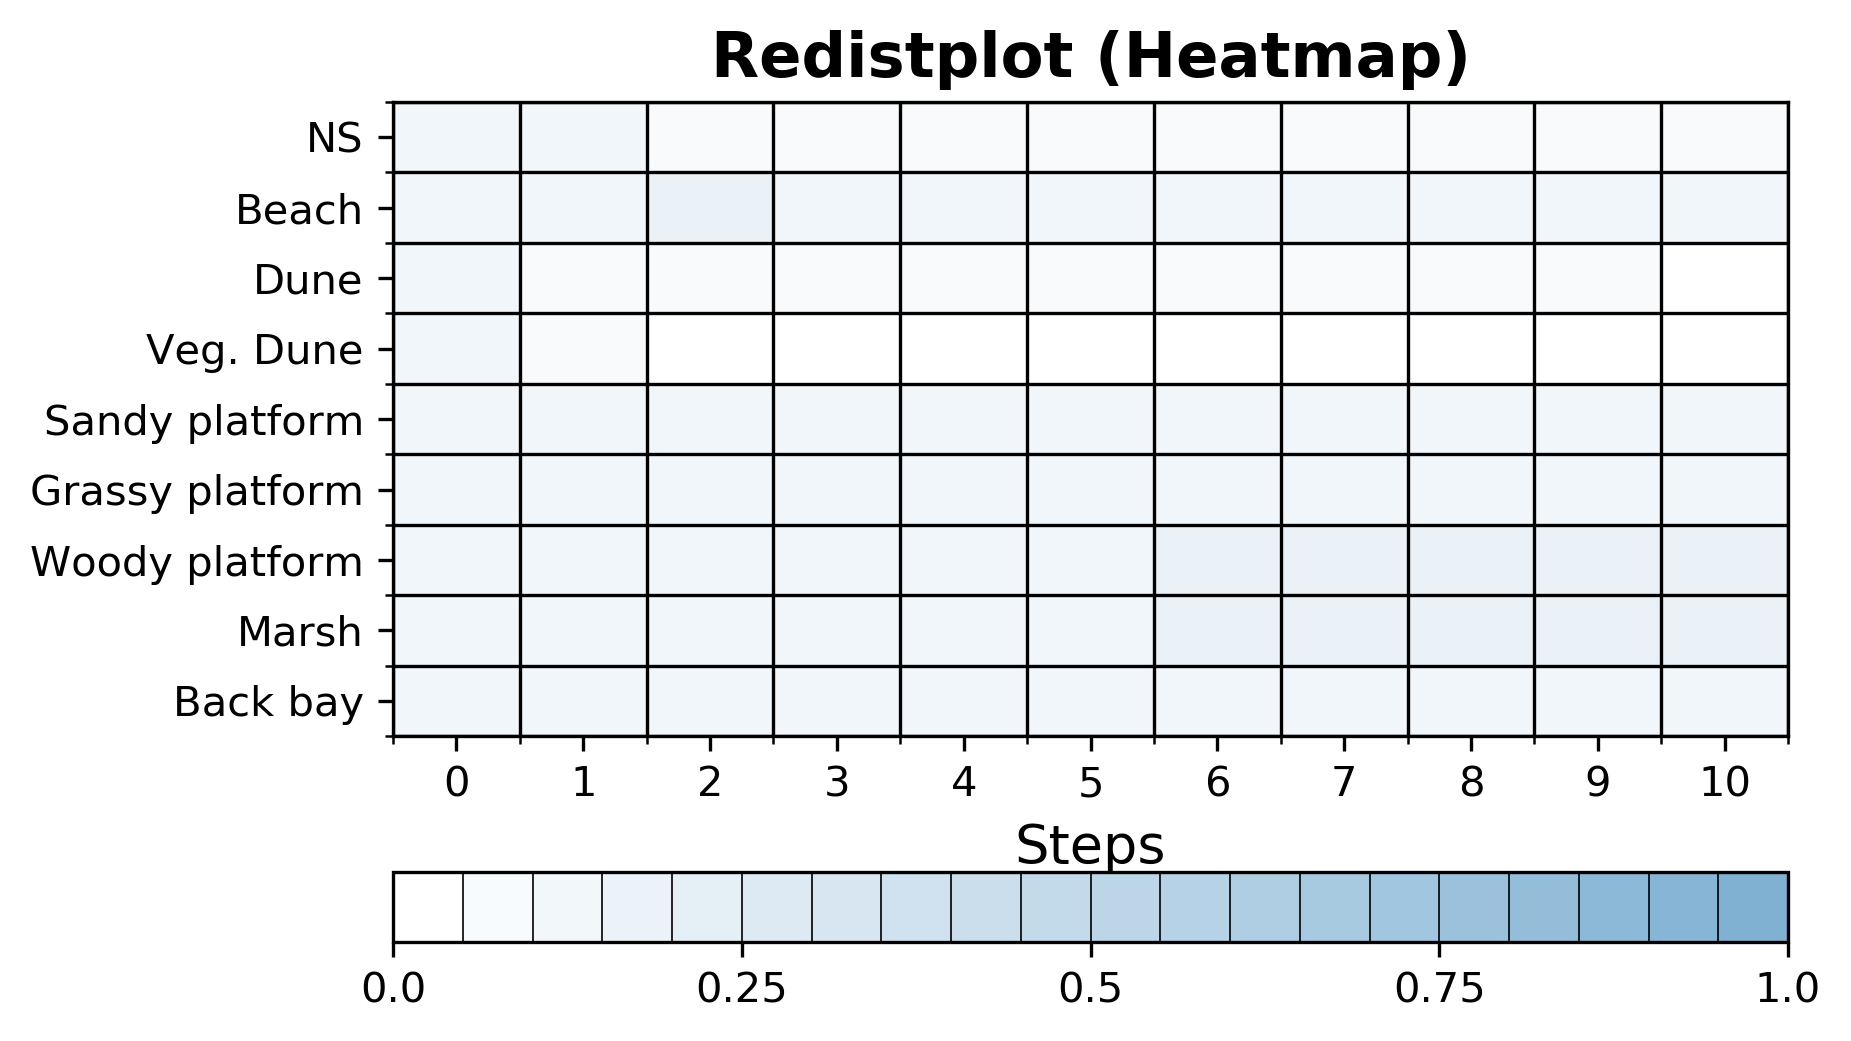

In [17]:
pydtmc.plot_redistributions(mc, 10, plot_type='heatmap', dpi=300)

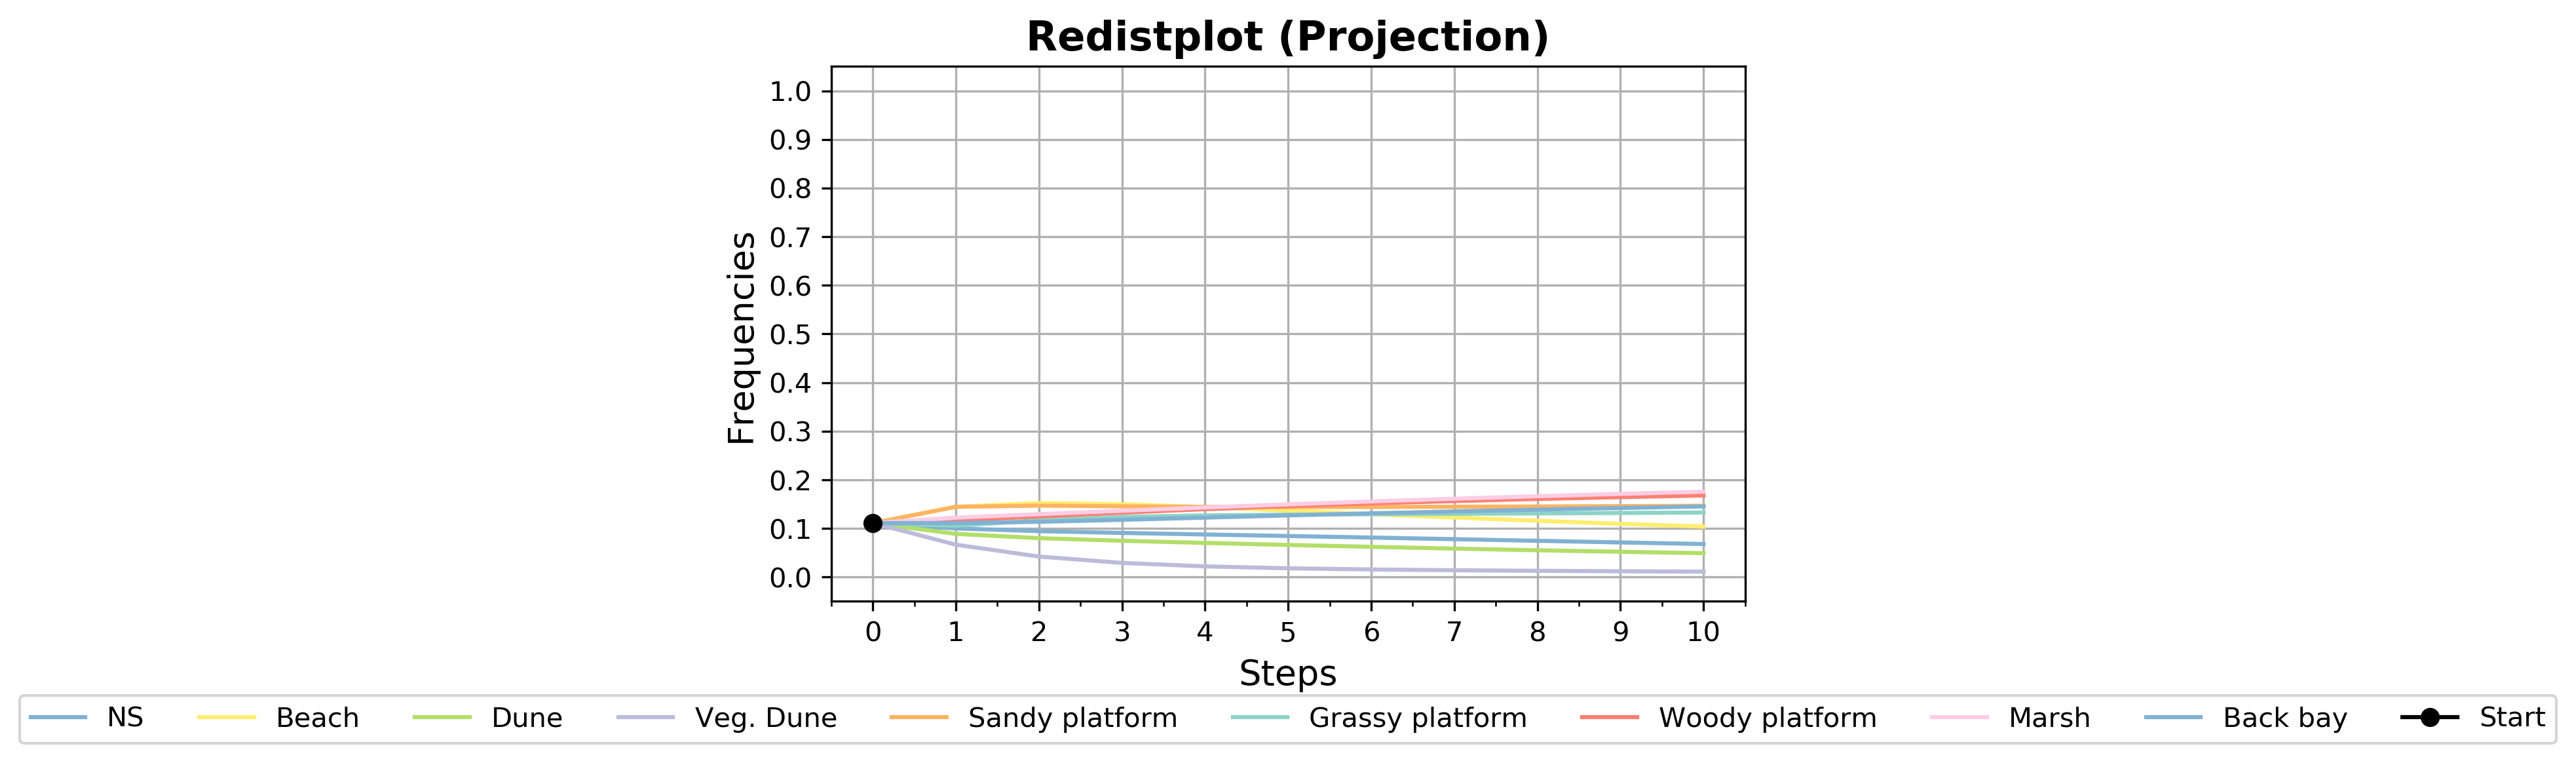

In [18]:
pydtmc.plot_redistributions(mc, 10, plot_type='projection', dpi=300)